In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [111]:
training_data = pd.read_csv("../Data/sample_training_data.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

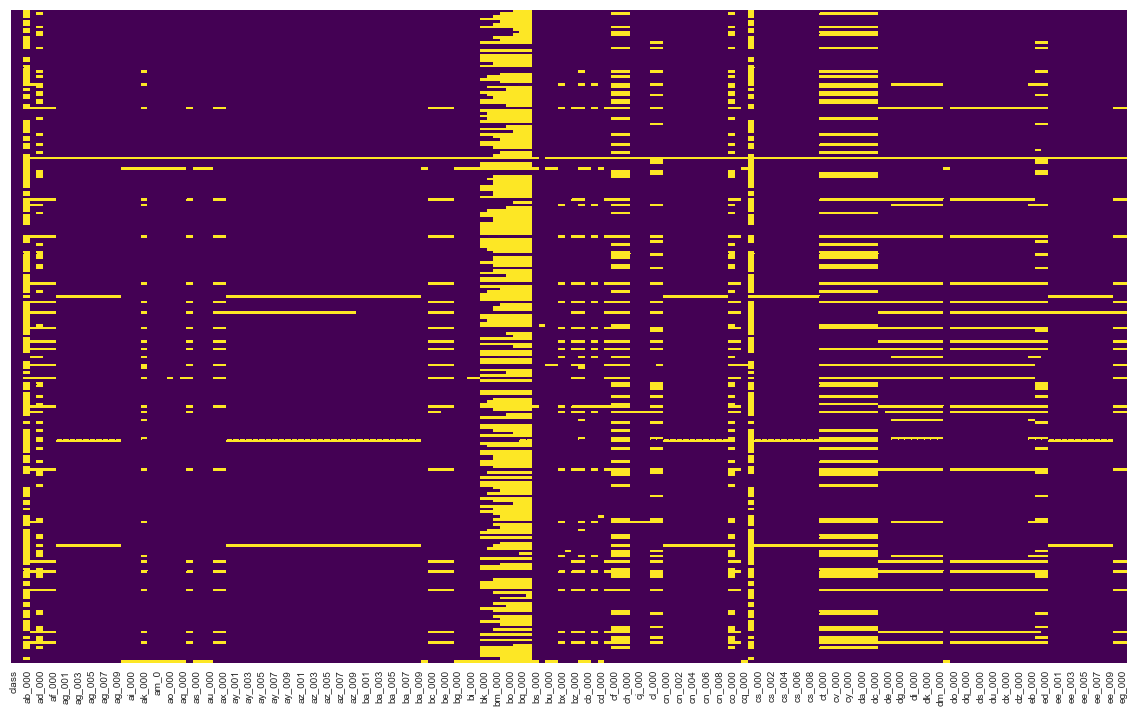

In [112]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>Second Approach</b>

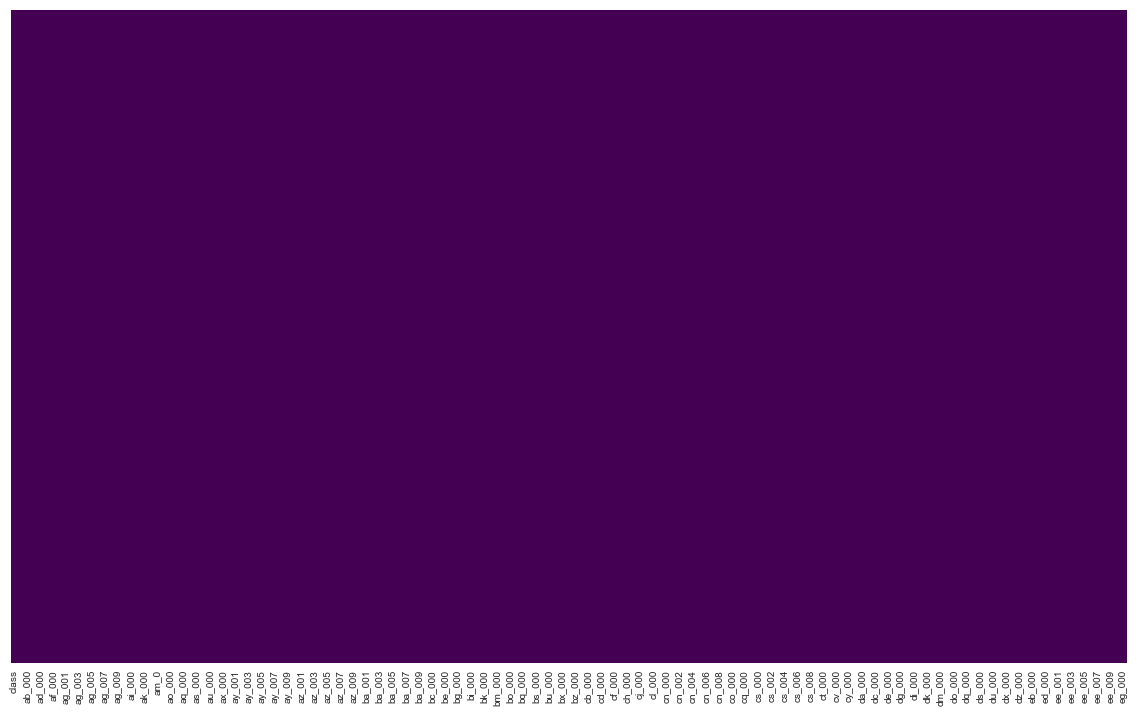

In [113]:
sample_training_data = training_data
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.463768,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.463768,0.000000e+00,373.401198,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.463768,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.463768,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [13]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


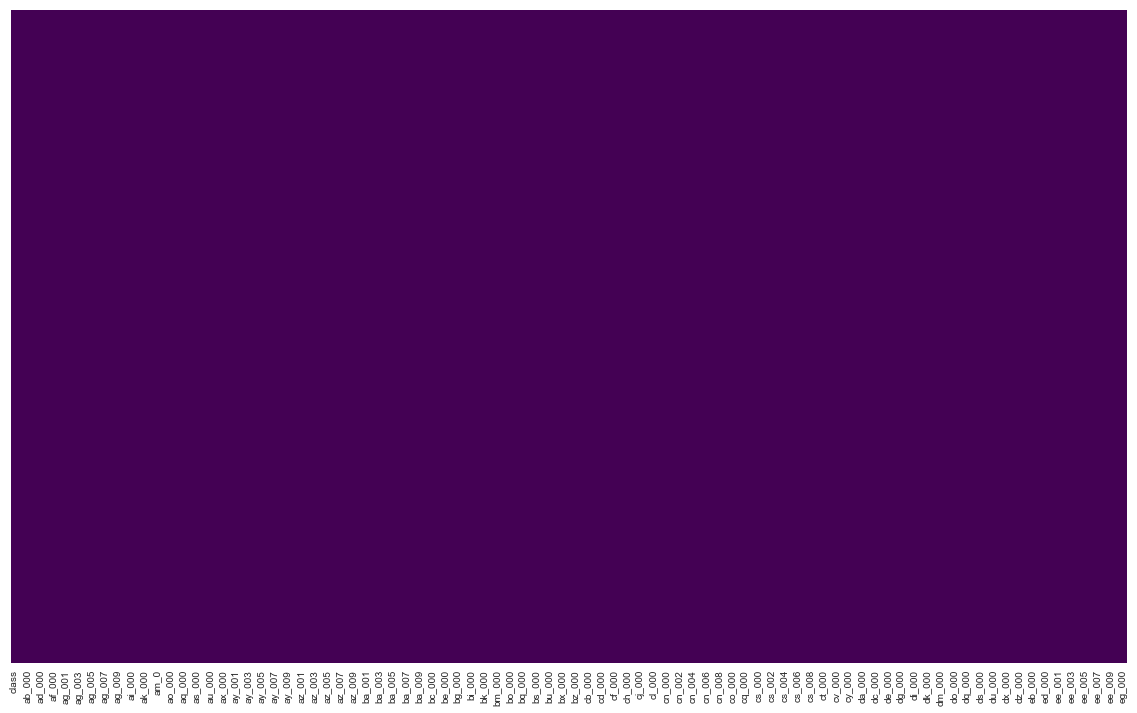

In [14]:
sample_testing_data = testing_data
sample_testing_data.fillna(sample_testing_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data = sample_testing_data.replace('neg',0)
sample_testing_data = sample_testing_data.replace('pos',1)

sample_testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# Checking on sample data

In [115]:
def getCost(y_test,prediction):
    '''
    evaluate the total cost without modified threshold
    '''
    tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
    confusionData = [[tn,fp],[fn,tp]]
    print("Confusion Matrix\n")
    print(pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP']))
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    print("\n\nCost\n")
    print(pd.DataFrame(values))

In [116]:
def getCostWithThreshold(X_test,y_test,prediction,threshold,model):
    """
    evaluate the total cost with modified threshold
    model = model instance
    """
    THRESHOLD = threshold #optimal one chosen from the roc curve
    thresholdPrediction = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1,0)
    tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    pd.DataFrame(values)

In [117]:
def aucForThreshold(X_test,y_test,model):
    """
    return roc auc curve for determining the optimal threshold
    model = desired model's instance
    """
    from sklearn.metrics import roc_auc_score,roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper center")
    plt.savefig('Log_ROC')


    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
    ax2.set_ylabel('Threshold',color='g')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.legend(loc="lower right")
    plt.savefig('roc_and_threshold.png')
    plt.show()

In [118]:
def evaluationScored(y_test,prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    r2 = metrics.r2_score(y_test, prediction)
    f1 = metrics.f1_score(y_test, prediction)
    mse = metrics.mean_squared_error(y_test, prediction)
    values = {'Accuracy Score':[acc],'R2':[r2],'F1':[f1],'MSE':[mse]}
    print("\n\nScores")
    print (pd.DataFrame(values))
    

# Model implementation with Cross validation

In [120]:
X = sample_training_data.drop('class',axis=1)
y = sample_training_data['class']

In [122]:
CV_prediction = cross_val_predict(SVC(),X,y,cv = 5)

In [123]:
evaluationScored(y,CV_prediction)



Scores
   Accuracy Score        R2   F1       MSE
0        0.967871 -0.033195  0.0  0.032129


In [124]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       241
           1       0.00      0.00      0.00         8

   micro avg       0.97      0.97      0.97       249
   macro avg       0.48      0.50      0.49       249
weighted avg       0.94      0.97      0.95       249



In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
svc_model = SVC()

In [127]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [128]:
trainingPrediction = svc_model.predict(X_test)

In [129]:
evaluationScored(y_test,trainingPrediction) 



Scores
   Accuracy Score        R2   F1       MSE
0        0.986667 -0.013514  0.0  0.013333


In [130]:
print(classification_report(y,CV_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       241
           1       0.00      0.00      0.00         8

   micro avg       0.97      0.97      0.97       249
   macro avg       0.48      0.50      0.49       249
weighted avg       0.94      0.97      0.95       249



In [133]:
getCost(y_test,trainingPrediction)

Confusion Matrix

    FN  FP
TN  74   0
TP   1   0


Cost

   Score  Number of Type 1 faults  Number of Type 2 faults
0    500                        0                        1


<b>With threshold</b>

In [ ]:
aucForThreshold(X_test,y_test,svc_model)

In [ ]:
#need to implement
getCostWithThreshold(X_test,y_test,trainingPrediction,threshold,svc_model)

<b>With Gridsearch</b>

In [158]:
param_grid = {'C': [0.01,0.1,1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [159]:
from sklearn.model_selection import GridSearchCV

In [167]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [161]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV]  C=0.1, gamma=10, ke

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.9655172413793104, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9491525423728814, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf .........

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [162]:
grid.best_params_

{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}

In [163]:
grid.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
grid_predictions = grid.predict(X_test)

In [165]:
evaluationScored(y_test,grid_predictions)



Scores
   Accuracy Score        R2   F1       MSE
0        0.986667 -0.013514  0.0  0.013333


In [166]:
getCost(y_test,grid_predictions)

Confusion Matrix

    FN  FP
TN  74   0
TP   1   0


Cost

   Score  Number of Type 1 faults  Number of Type 2 faults
0    500                        0                        1


# Testing Data implementation 

In [168]:
from sklearn.metrics.scorer import make_scorer

In [ ]:
make_scorer()